### 상관분석

* 두 변수 x, y가 있을때 두 변수가 서로 어떤 관계에 있는지 분석하는 과정

* 보통 2개의 등간/비율 척도 변수를 분석할때 우선적으로 산점도를 그려 변수간의 관계를 시각화 한 후 상관계수를 계산

* 상관분석의 예
  - 키x가 클수록 몸무게y도 증가하는가?
  - 교육을 많이 받으면 수입도 증가하는가?
  - 광고를 많이 하면 판매량이 증가하는가?
  - 운동을 많이 하면 몸무게는 감소하는가?
  - 담배를 줄이면 심혈관 질병 발생비율은 낮아지는가?


* 두 변수 정의 : 독립변수, 종속변수
  - 독립변수 : 종속변수를 추정하거나 예측하는데 토대를 제공 (원인/설명 변수)

  - 종속변수 : 예측되거나 추정되는 변수 독립변수의 특정값에 대한 결과를 의미 (결과/반응 변수)

  - 독립변수와 종속변수는 인과관계를 가질 가능성이 높음 (원인-결과 관계)
            => 즉, 변수 X가 다른 변수 Y에 영향을 주는 관계를 의미

### A회사의 광고비 지출이 매출에 어느정도 영향을 주는지
+ 파악하기 위해 광고비와 매출액간의 관계를 조사해 봄

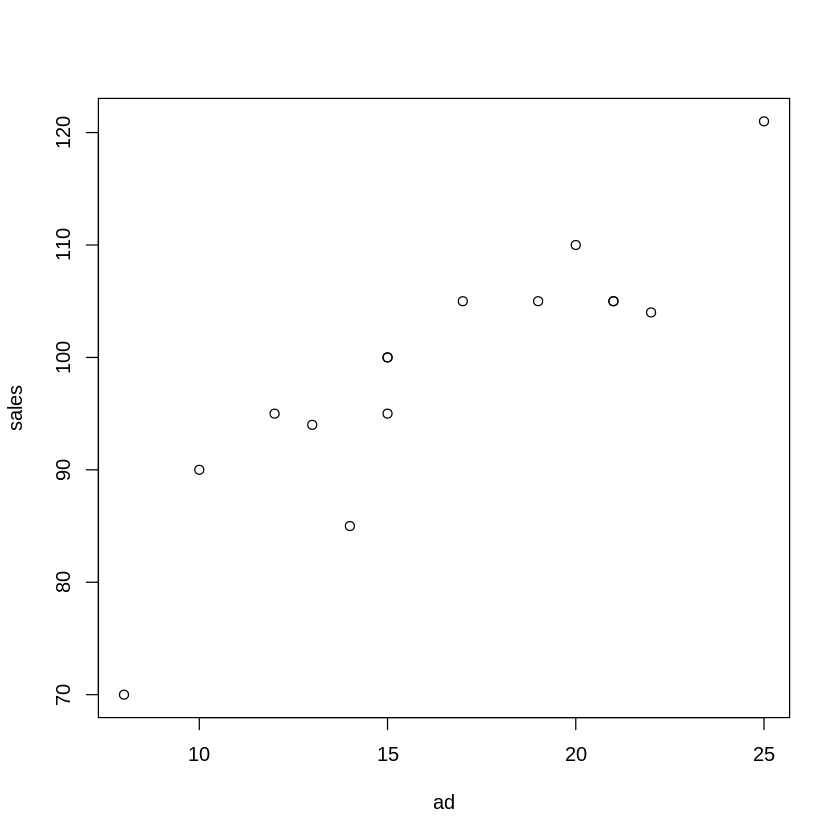

In [1]:
# 광고비와 매출액간의 연관성 파악을 위해 산점도로 시각화해 보세요
ad <- c(13,8,10,15,12,15,14,15,17,19,20,21,22,21,25)
sales <- c(94,70,90,100,95,100,85,95,105,105,110,105,104,105,121)

plot(ad, sales)

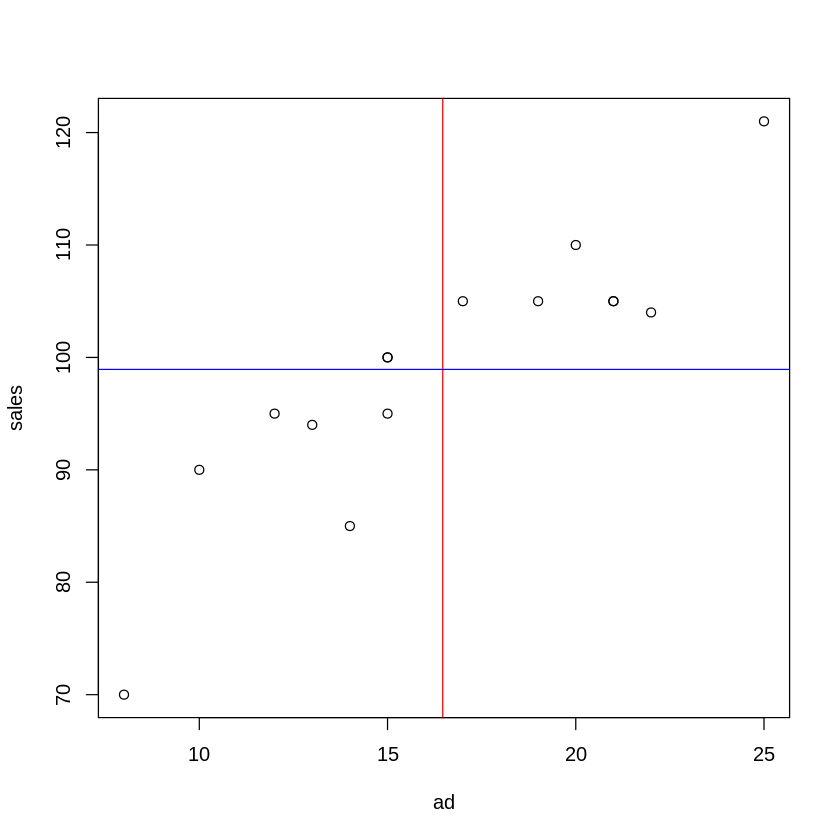

In [2]:
# 독립변수와 종속변수 변화간의 관계 파악
plot(ad, sales)

abline(v=mean(ad), col='red')    # 수직선v 긋기
abline(h=mean(sales), col='blue')# 수평선h 긋기

In [3]:
# applewood 자동차판매 데이터를 기초로
# 구매자 연령과 판매이익간의 상관관계를 파악해보세요

aw = read.csv('csv/applewood.txt', sep=' ')
head(aw)

,Age,Profit,Location,Vehicle.Type,Previous
,<int>,<fct>,<fct>,<fct>,<int>
1,21,"$1,387",Tionesta,Sedan,0
2,23,"1,754",Sheffield,SUV,1
3,24,"1,817",Sheffield,Hybrid,1
4,25,"1,040",Sheffield,Compact,0
5,26,"1,273",Kane,Sedan,1
6,27,"1,529",Sheffield,Sedan,1


In [4]:
age <- aw$Age
profit <- as.character(aw$Profit)
head(profit)     # $기호와 컴마가 있어서 숫자로 변환x

[1] "$1,387" "1,754"  "1,817"  "1,040"  "1,273"  "1,529"

[1] 1387 1754 1817 1040 1273 1529

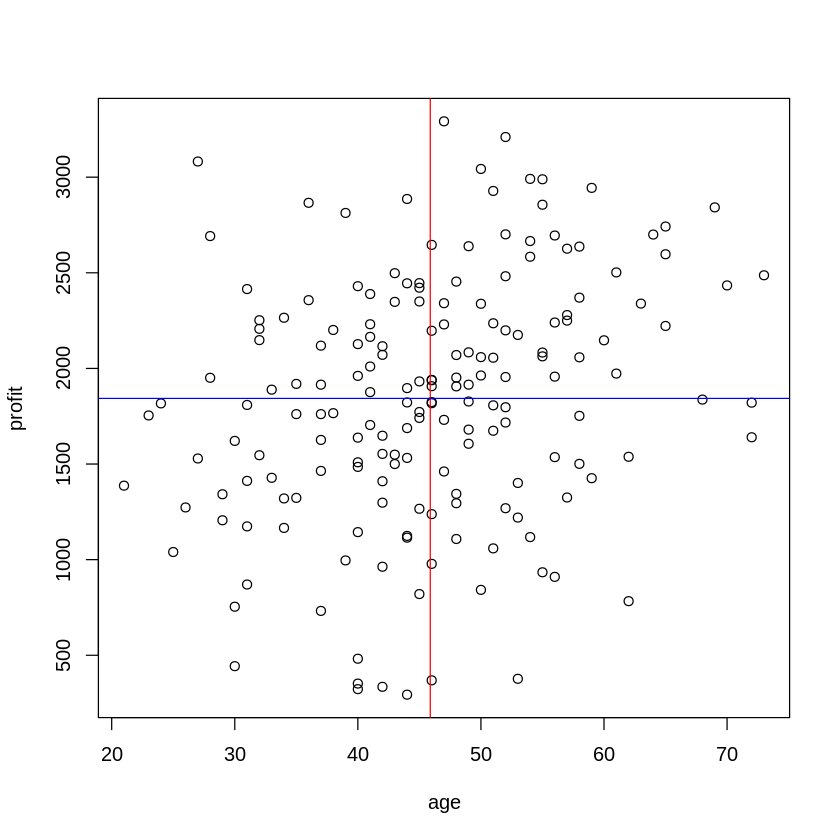

In [5]:
# 문자교체 : gsub('찾을문자', '바꿀문자', 객체)

profit <- gsub(',', '', profit)
profit <- gsub('\\$', '', profit)
profit <- as.integer(profit)

head(profit)
plot(age, profit)
plot(age, profit)
abline(v=mean(age), col='red')
abline(h=mean(profit), col='blue')

#### 광고비와 매출액의 산점도에서 보듯 점들이 2, 4분면에 분포되어 있으므로 독립/종속 변수의 관계는 비례임 - 상관관계가 있음

#### 구매자 나이와 판매이익의 산점도에서 보듯 점들이 모든 분면에 분포되어 있으므로 독립/종속 변수의 관계가 명확하게 규정하기 어려움 - 상관관계가 보이지 않음

### 상관관계correlation

+ 두 변수 사이에 서로 주고 받는 관계가 있음
    => 선형관계 여부와 연관성이 존재

+ 양/음의 상관관계, 무 상관관계등 3가지 존재
    => 각 변수의 관계를 기울기에 따라 양/음의 상관계수로 분류함

+ 상관관계를 나타내는 정도를 상관계수라 하는데 한편, 강력하게 관계가 나타나기도 하지만 아리까리하게 있는듯 없는 듯한 관계도 있을수 있음 이러한 차이를 명확하게 하기 위해 상관계수를 사용


## 피어슨 상관계수

### 공분산covariance

+ 두 변수가 각 평균으로부터 떨어져 있는 정도를 구한 후 표본의 갯수로 나누어 계산한 것
+ 공분산에서는 x와 y의 편차들을 서로 곱해주는데, 그 이유는 두 변수간의 관계가 편차들의 곱에 반영이 되기 때문.
+ 하나의 x값이 평균보다 클 때 y도 평균보다 크면 두 편차의 곱은 양수.
+ 반면 한 x값이 평균보다 클 때 y는 평균보다 작으면 편차의 곱으로 음수가 되는 점을 이용한 것.
+ 곱한 값들을 모두 더해 양의 관계가 우세한지 음의 관계가 우세한지 측정.

+ 결과가 양수 또는 음수로 나올수 있음
    - 양수 -> 양의 상관관계 있음 (x증가->y증가)
    - 음수 -> 음의 상관관계 있음 (x증가->y감소)


+ R에서는 cov 함수를 사용

In [6]:
# 광고비와 매출액간의 상관계수와 공분산 계산

cor(ad, sales) 

cov(ad, sales)

[1] 0.8879209

[1] 50.24762

## 상관계수 vs 공분산
### 상관계수

+ 두 변수가 함께 변하는 정도를 -1~1 범위의 수치로 나타낸 것
+ 단위로 인한 공분산의 차이를 어느 정도 보완해 줌
+ 일반적으로 칼피어슨이 개발한 피어슨 상관계수를 사용함
+ numpy의 corrcoef 함수를 사용함

+ 상관계수 범위에 따른 상관정도 해석
    - -1.0 ~ -0.7 : 매우 강한 음의 상관관계 있음
    - -0.7 ~ -0.3 : 강한 음의 상관관계 있음
    - -0.3 ~ -0.1 : 약한 음의 상관관계 있음
    - -0.1 ~  0.1 : 상관관계 없음
    -  0.1 ~  0.3 : 약한 양의 상관관계 있음
    -  0.3 ~  0.7 : 강한 양의 상관관계 있음
    -  0.7 ~  1.0 : 매우 강한 양의 상관관계 있음

In [7]:
# 놀이동산 parks 데이터를 이용해서 놀이기구 rides와 전체 만족도 overall의 상관관계를 분석 하시오
library(ggplot2)
parks <- read.csv('csv/parks.csv')

str(parks)
head(parks)

'data.frame':	500 obs. of  8 variables:
 $ weekend  : Factor w/ 2 levels "no","yes": 2 2 1 2 1 1 2 1 1 2 ...
 $ num.child: int  0 2 1 0 4 5 1 0 0 3 ...
 $ distance : num  114.6 27 63.3 25.9 54.7 ...
 $ rides    : int  87 87 85 88 84 81 77 82 90 88 ...
 $ games    : int  73 78 80 72 87 79 73 70 88 86 ...
 $ wait     : int  60 76 70 66 74 48 58 70 79 55 ...
 $ clean    : int  89 87 88 89 87 79 85 83 95 88 ...
 $ overall  : int  47 65 61 37 68 27 40 30 58 36 ...


,weekend,num.child,distance,rides,games,wait,clean,overall
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,yes,0,114.64826,87,73,60,89,47
2,yes,2,27.01410,87,78,76,87,65
3,no,1,63.30098,85,80,70,88,61
4,yes,0,25.90993,88,72,66,89,37
5,no,4,54.71831,84,87,74,87,68
6,no,5,22.67934,81,79,48,79,27


[1] 50.82939

[1] 0.5859863

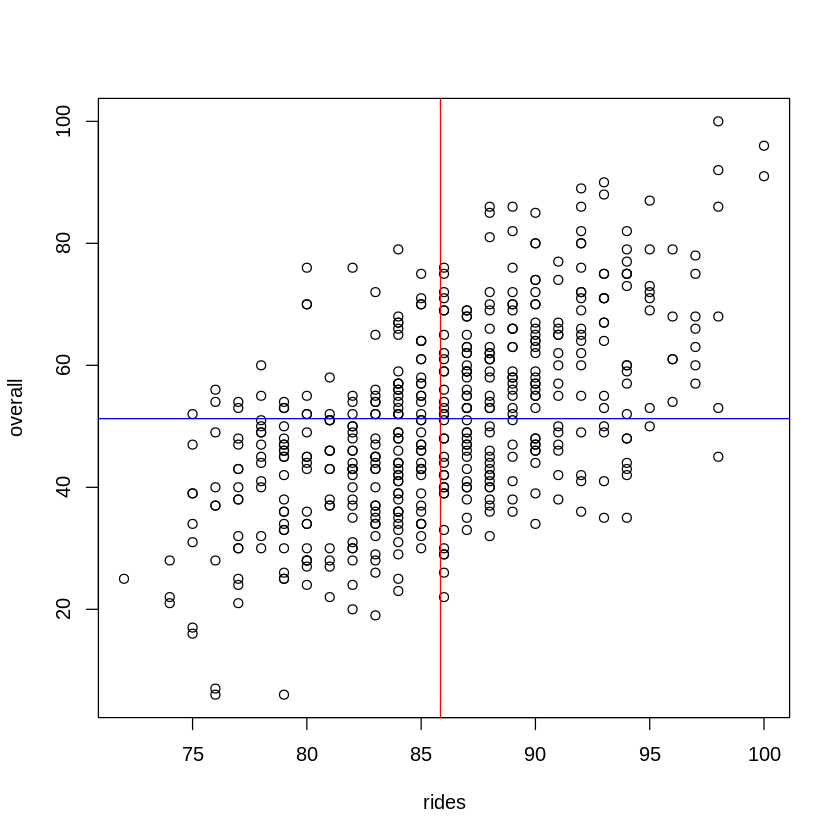

In [8]:
overall <- parks$overall
rides <- parks$rides

plot(rides, overall)
abline(v=mean(rides), col='red')
abline(h=mean(overall), col='blue')

cov(rides, overall)
cor(rides, overall)

### 상관계수 행렬과 히트맵

+ 보통 다수의 변수간의 상관계수를 구할때는 일일히 계산하지 않고 상관계수 행렬을 사용함
+ 하지만, 많은 변수들간의 상관계수를 표로 나타내기엔 가독성이 좋지 않음
+ 히트맵이라는 시각화도구를 사용하면 상관계수와 상관정도를 색상으로 표현하기 때문에 가독성과 이해도가 좋아짐

+ R에서는 corrplot 함수를 사용

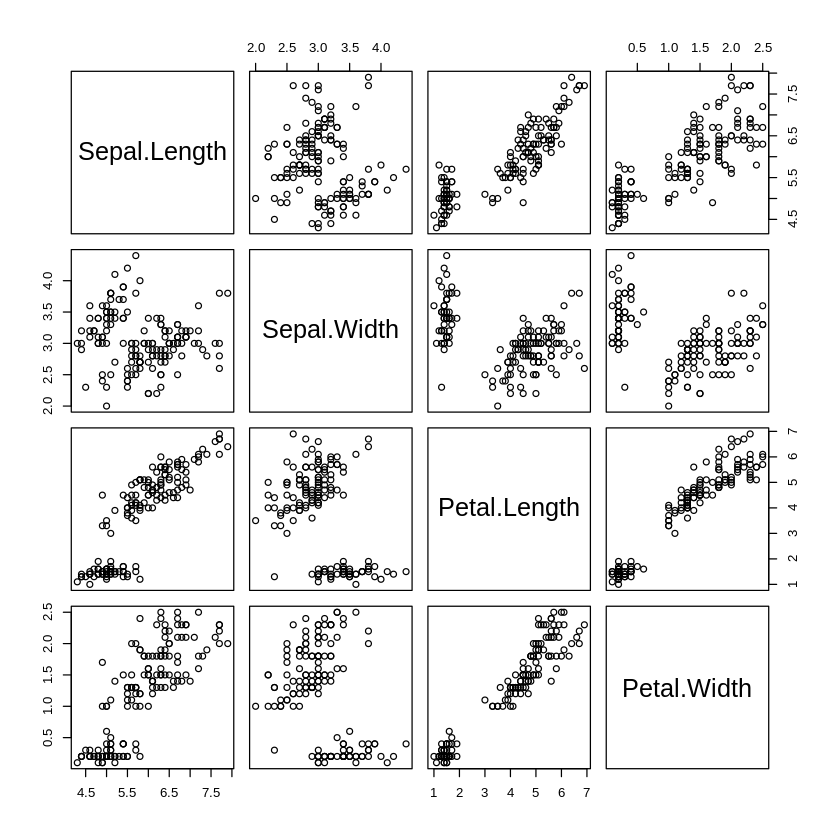

In [9]:
# iris 데이터셋의 변수들에 대한 상관행렬을 그려보세요
plot(iris[,1:4]) # 산점도 행렬

In [10]:
cor(iris[,1:4]) # 상관계수 행렬

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


In [11]:
# install.packages('corrplot')
library(corrplot)

corrplot 0.90 loaded



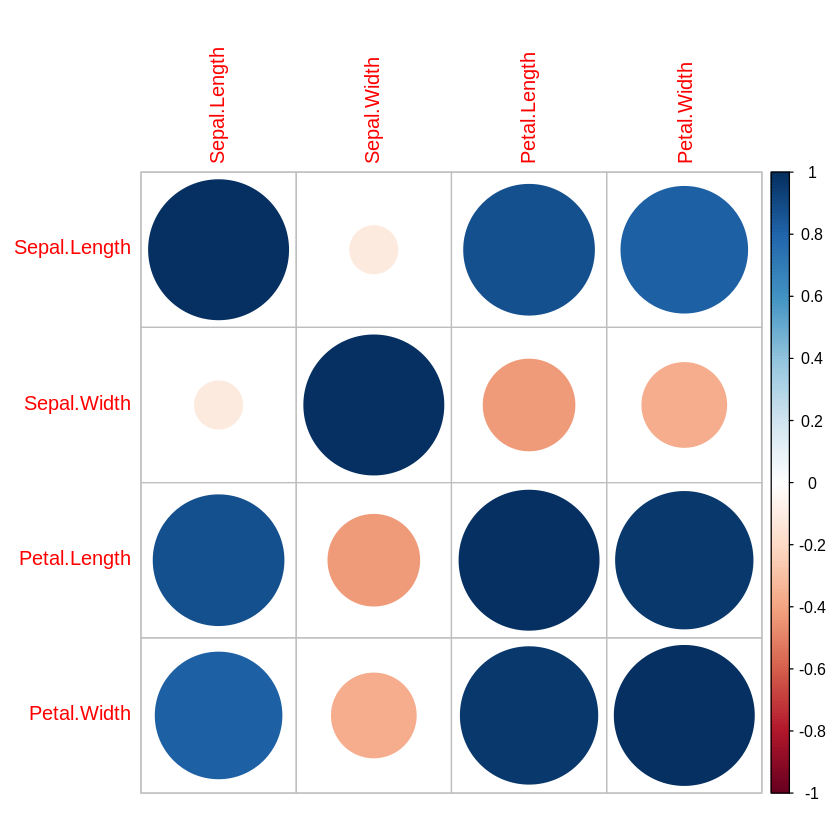

In [12]:
cor <- cor(iris[,1:4])
corrplot(cor)

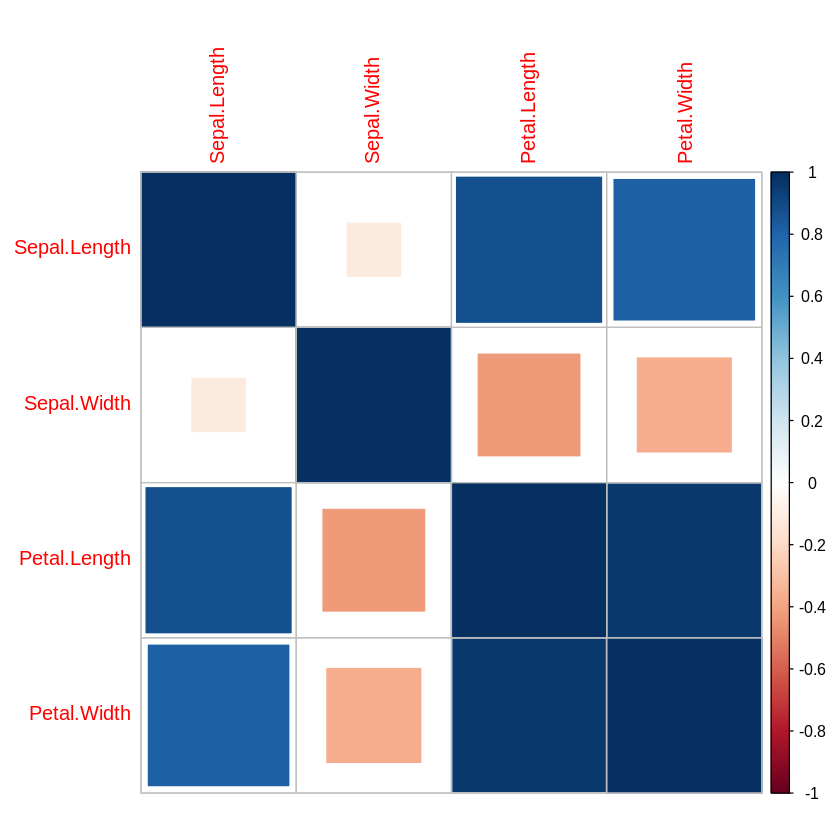

In [13]:
# 상관관계를 도형으로 표시
corrplot(cor, method='square')  

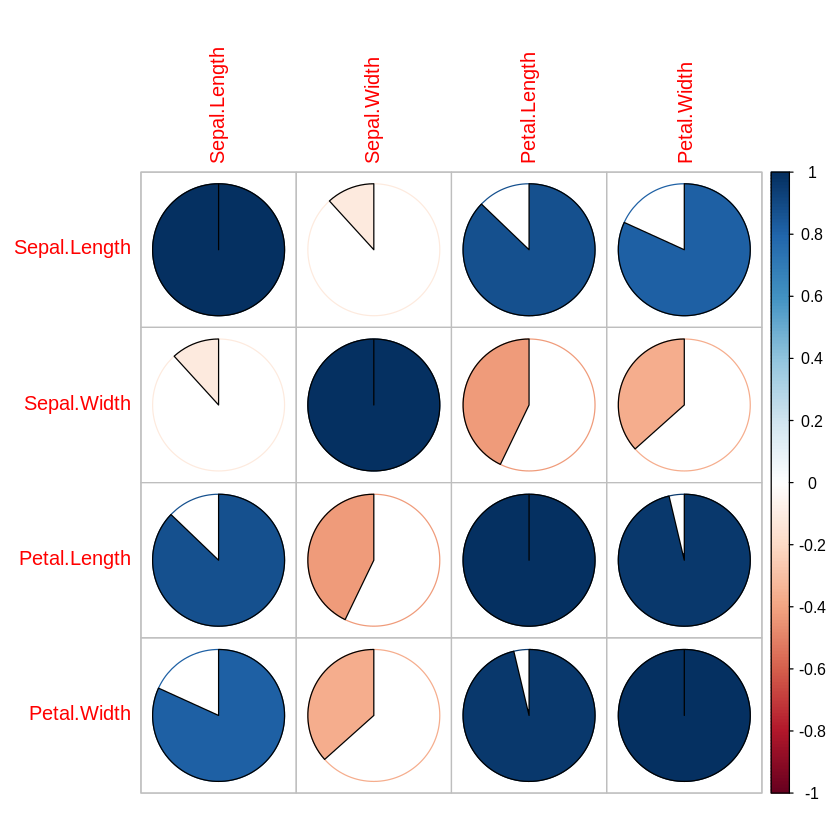

In [14]:
# 상관관계를 도형으로 표시
corrplot(cor, method='pie')  

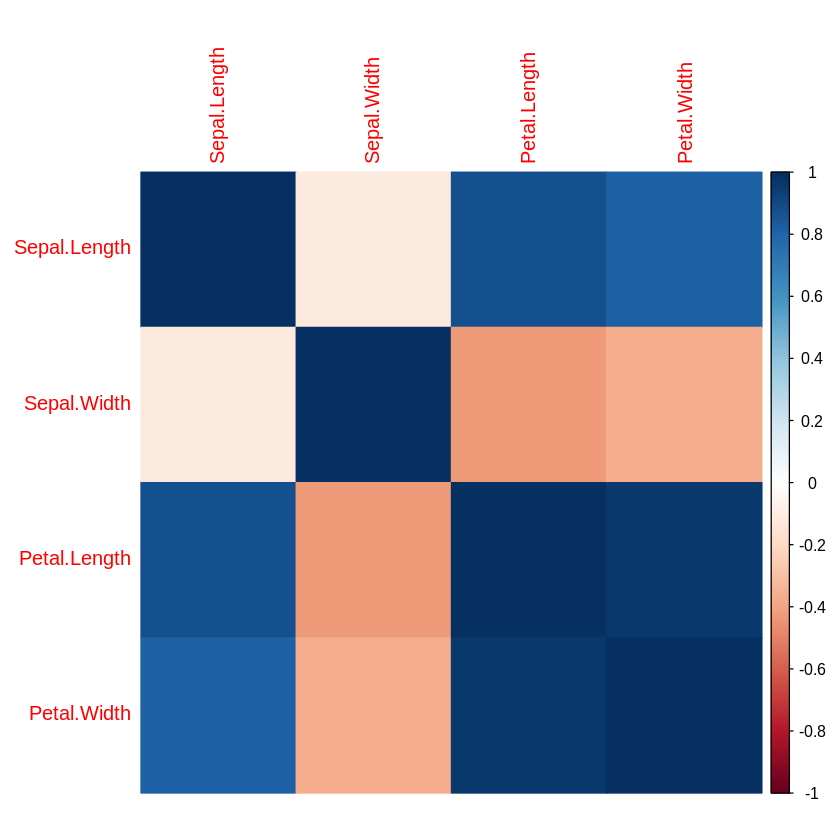

In [15]:
# 상관관계를 도형으로 표시
corrplot(cor, method='color')  

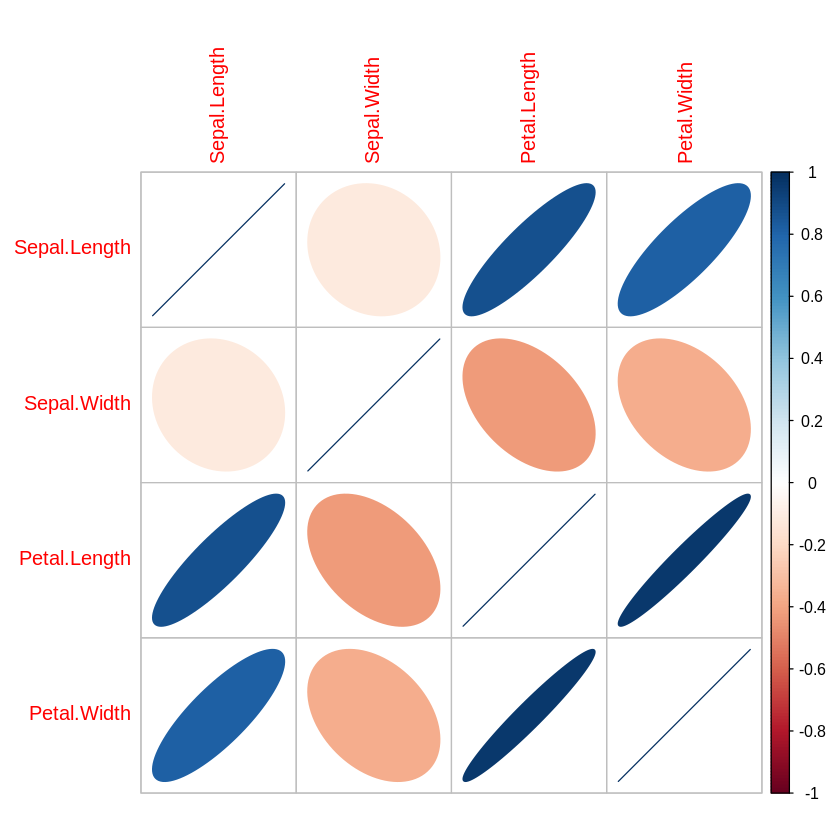

In [16]:
# 상관관계를 도형으로 표시
corrplot(cor, method='ellipse')  

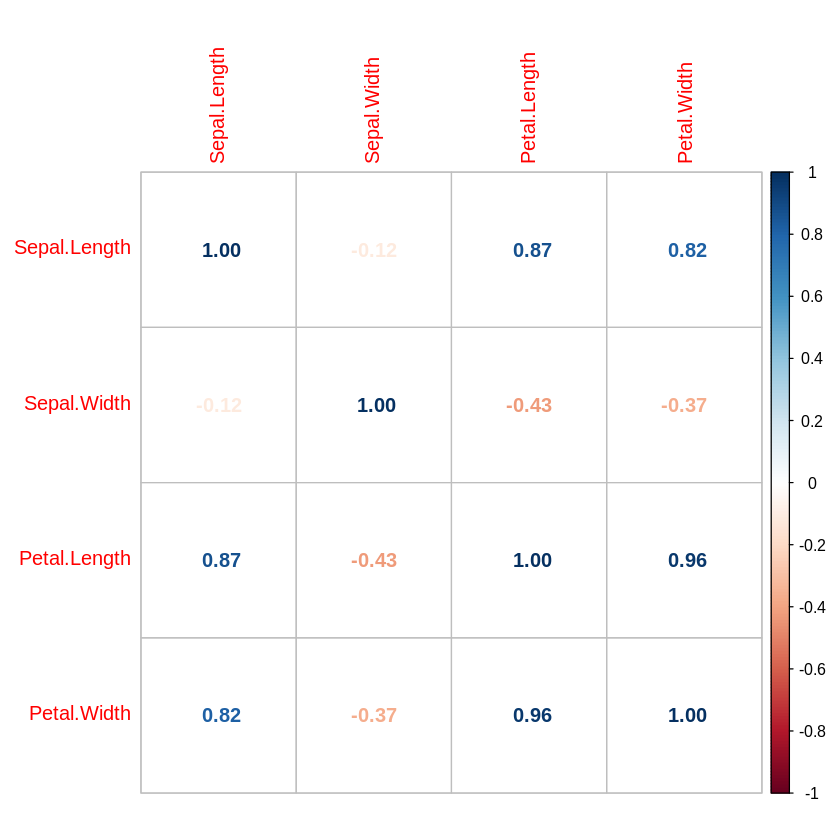

In [17]:
# 상관관계를 도형으로 표시
corrplot(cor, method='number')  

+ 산점도 행렬보다 좀 더 세련된 형태의 그래프 행렬표시
+ 추세선으로 상관관계를 쉽게 파악가능
+ R에서 pairs 함수 사용

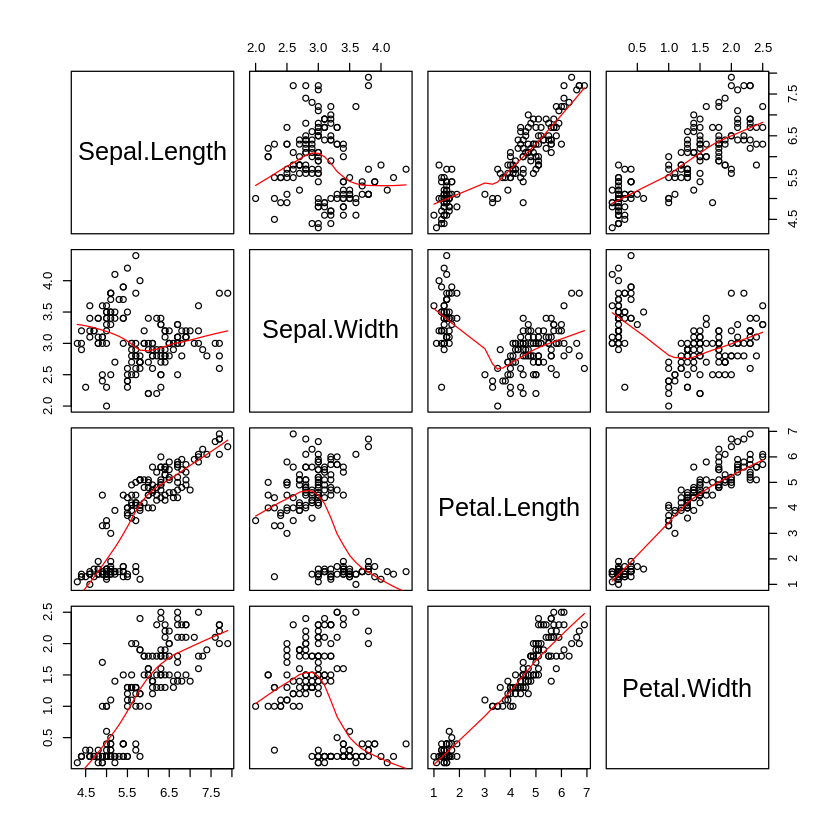

In [18]:
pairs(iris[,1:4], panel=panel.smooth)

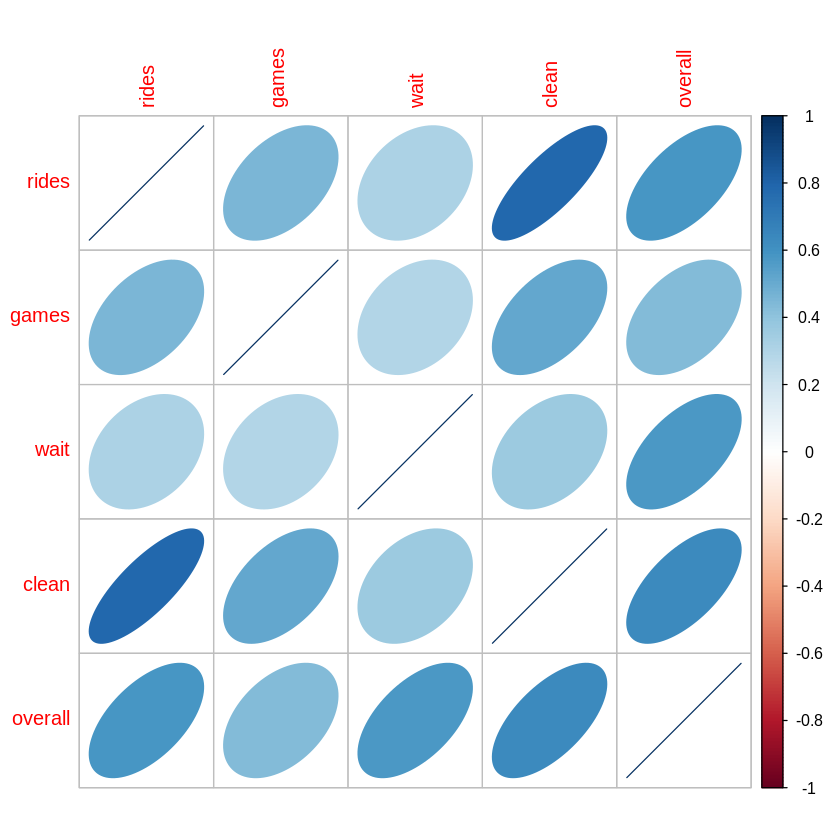

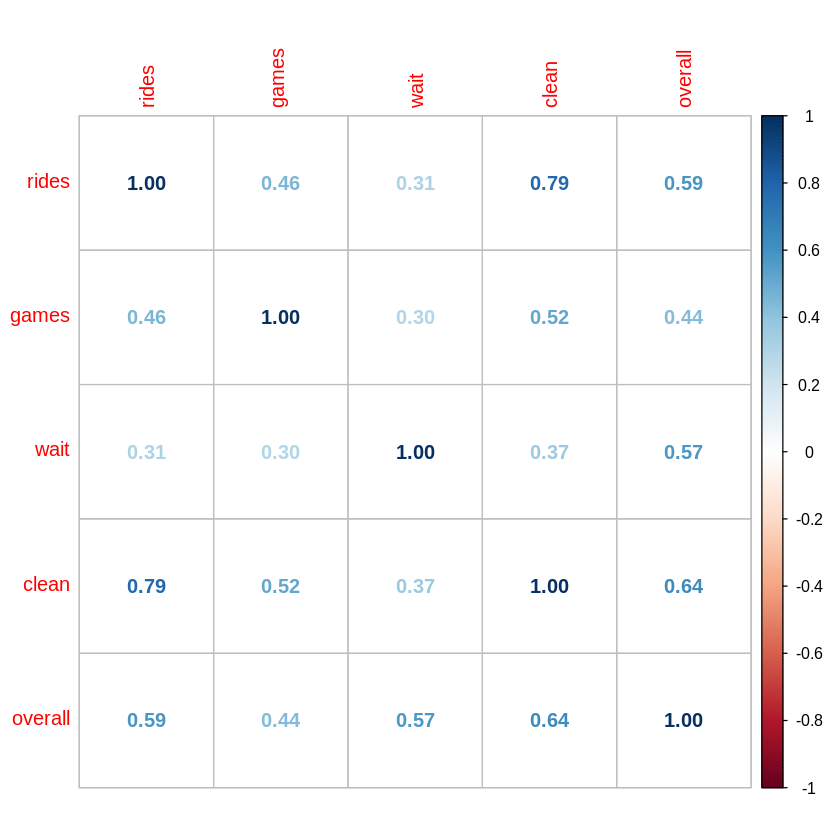

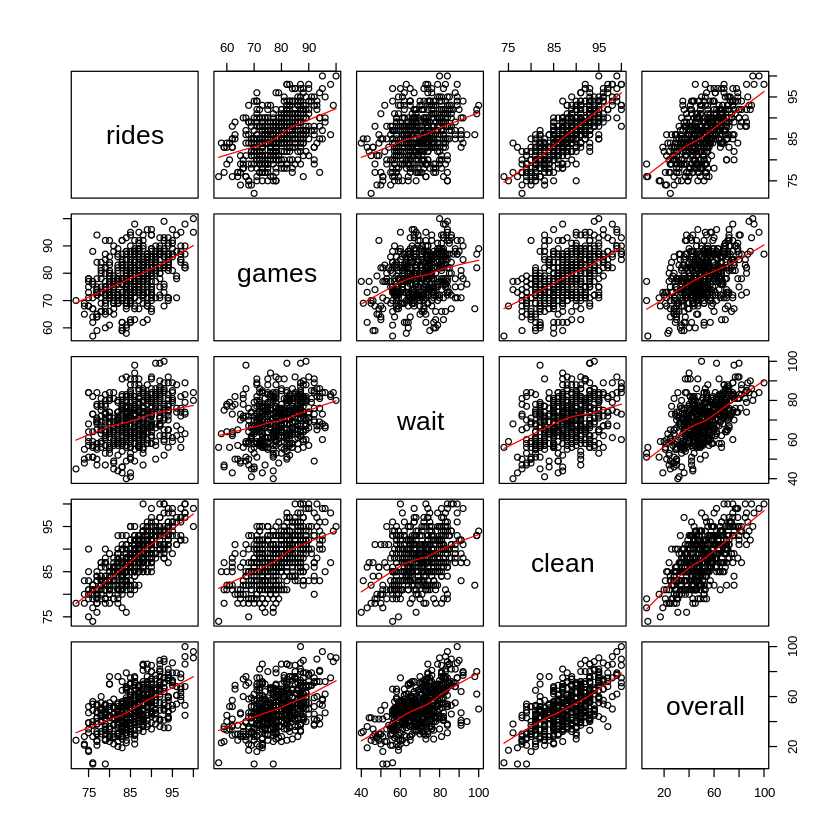

In [19]:
# 놀이동산 parks 데이터에 상관행렬과 산점도 행렬을 나타내 보시오
cor <- cor(parks[,4:8])
corrplot(cor, method='ellipse')
corrplot(cor, method='number')
pairs(parks[,4:8], panel=panel.smooth)

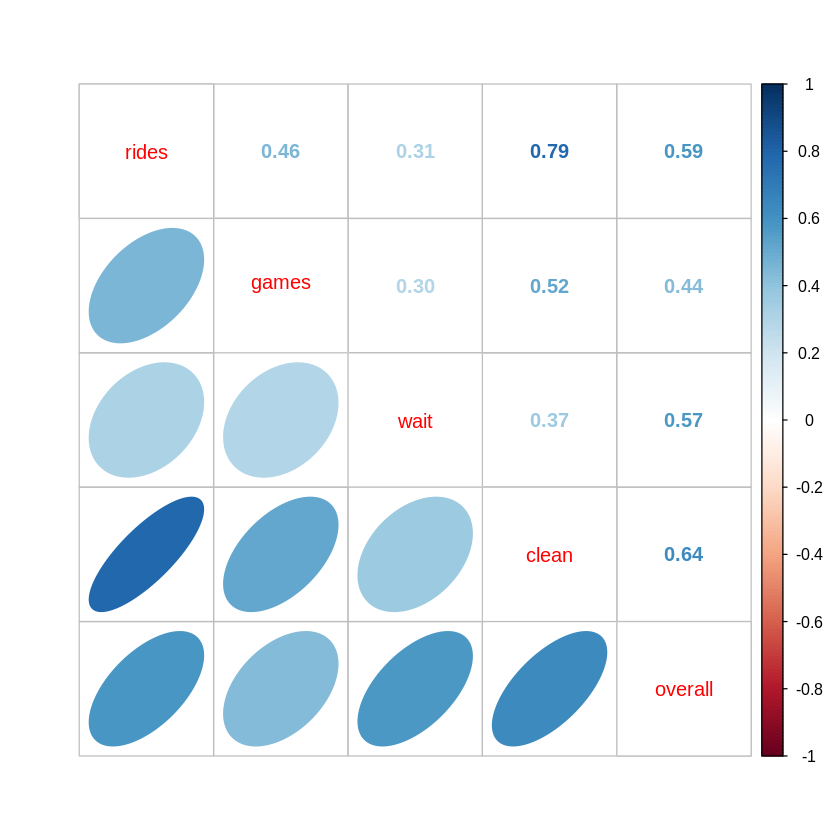

In [20]:
# corrplot 함수의 시각화를 혼합하려면 mixed 함수를 사용
corrplot.mixed(cor, upper='number', lower='ellipse')

### 상관계수 유의성 검정

+ 광고 횟수와 매출액이 서로 관련없는데 상관계수가 양으로 나온것은 아닐까?

+ 유의수준 0.05를 기준으로 가설검정 실시

+ 상관계수의 검정통계량은 t분포를 이용
    + 귀무가설 : 상관계수 0이다 (연관성 없음)
    + 대립가설 : 상관계수 0이 아니다 (연관성 있음)
+ R에서는 cor.test 함수를 이용함

In [21]:
options(scipen=100) # 지수표기법 -> 소수점 표시
# 광고 횟수와 매출액간의 상관계수 유의성을 알아봄
cor.test(ad, sales)


	Pearson's product-moment correlation

data:  ad and sales
t = 6.9597, df = 13, p-value = 0.000009921
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6890898 0.9624256
sample estimates:
      cor 
0.8879209 


In [22]:
# 놀이동산 데이터를 이용해서 놀이기구 rides와 전체 만족도 overall의 상관계수 유의성을 알아봄
cor.test(parks$rides, parks$overall)


	Pearson's product-moment correlation

data:  parks$rides and parks$overall
t = 16.138, df = 498, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5252879 0.6407515
sample estimates:
      cor 
0.5859863 


In [23]:
# MASS 패키지의 Cars93 데이터셋을 이용해서 자동차의 각 요소와 연비mpg간의 상관관계를 분석하세요 (가격,배기량,마력,중량,RPM)
library(MASS)
head(Cars93)
# MPG.city <=> Price, EngineSize, Horsepower, Weight, RPM
str(Cars93)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


'data.frame':	93 obs. of  27 variables:
 $ Manufacturer      : Factor w/ 32 levels "Acura","Audi",..: 1 1 2 2 3 4 4 4 4 5 ...
 $ Model             : Factor w/ 93 levels "100","190E","240",..: 49 56 9 1 6 24 54 74 73 35 ...
 $ Type              : Factor w/ 6 levels "Compact","Large",..: 4 3 1 3 3 3 2 2 3 2 ...
 $ Min.Price         : num  12.9 29.2 25.9 30.8 23.7 14.2 19.9 22.6 26.3 33 ...
 $ Price             : num  15.9 33.9 29.1 37.7 30 15.7 20.8 23.7 26.3 34.7 ...
 $ Max.Price         : num  18.8 38.7 32.3 44.6 36.2 17.3 21.7 24.9 26.3 36.3 ...
 $ MPG.city          : int  25 18 20 19 22 22 19 16 19 16 ...
 $ MPG.highway       : int  31 25 26 26 30 31 28 25 27 25 ...
 $ AirBags           : Factor w/ 3 levels "Driver & Passenger",..: 3 1 2 1 2 2 2 2 2 2 ...
 $ DriveTrain        : Factor w/ 3 levels "4WD","Front",..: 2 2 2 2 3 2 2 3 2 2 ...
 $ Cylinders         : Factor w/ 6 levels "3","4","5","6",..: 2 4 4 4 2 2 4 4 4 5 ...
 $ EngineSize        : num  1.8 3.2 2.8 2.8 3.5 2.2 3.8 5.7 3.

In [24]:
mpg1 <- Cars93[,c(5,12,13,25,14,7)]
head(mpg1)

,Price,EngineSize,Horsepower,Weight,RPM,MPG.city
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,15.9,1.8,140,2705,6300,25
2,33.9,3.2,200,3560,5500,18
3,29.1,2.8,172,3375,5500,20
4,37.7,2.8,172,3405,5500,19
5,30.0,3.5,208,3640,5700,22
6,15.7,2.2,110,2880,5200,22


In [25]:
mpg2 <- Cars93[,c(5,12,13,25,14,8)]
head(mpg2)

,Price,EngineSize,Horsepower,Weight,RPM,MPG.highway
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,15.9,1.8,140,2705,6300,31
2,33.9,3.2,200,3560,5500,25
3,29.1,2.8,172,3375,5500,26
4,37.7,2.8,172,3405,5500,26
5,30.0,3.5,208,3640,5700,30
6,15.7,2.2,110,2880,5200,31


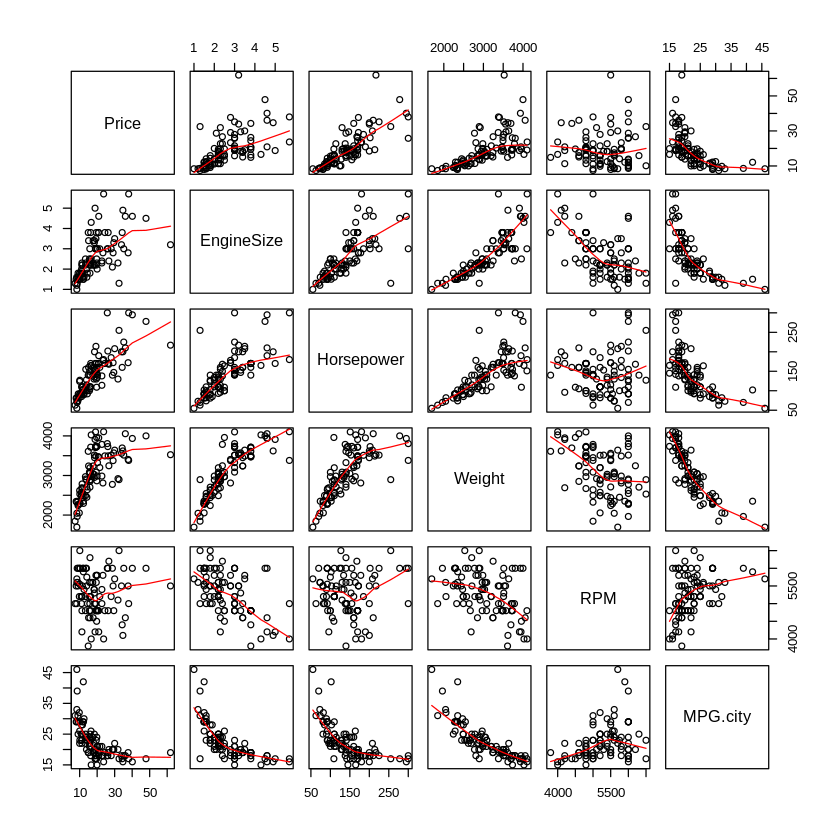

In [26]:
pairs(mpg1, panel=panel.smooth)

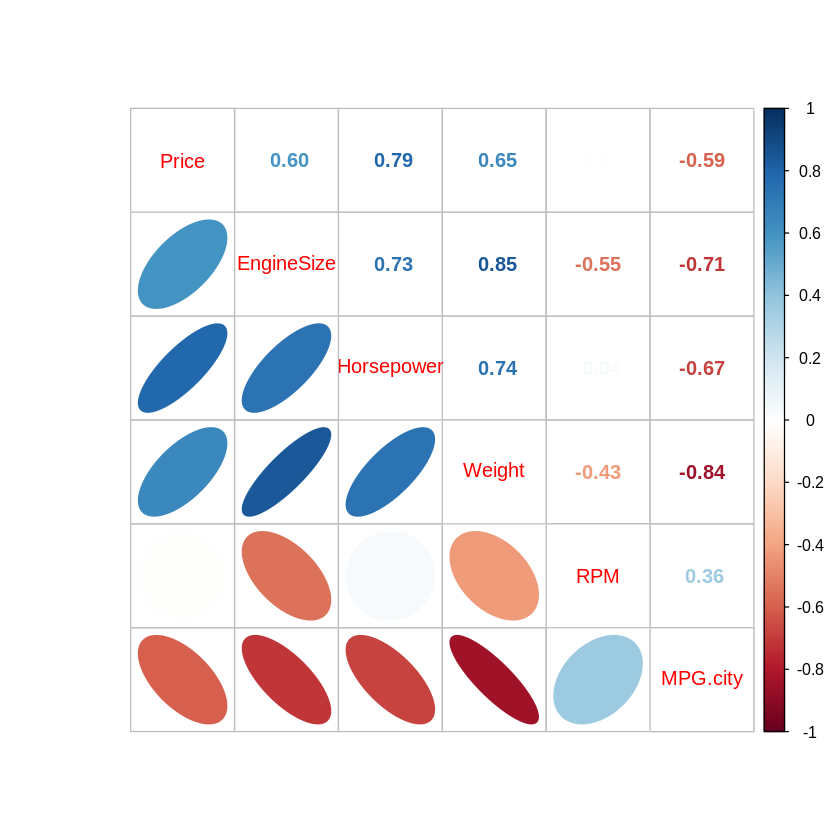

In [27]:
cor <- cor(mpg1)
corrplot.mixed(cor, upper = 'number',lower='ellipse')

In [28]:
# 연비와 관련있는 변수는 차량중량, 엔진크기임
cor.test(mpg1$MPG.city, mpg1$Weight)

cor.test(mpg1$MPG.city, mpg1$EngineSize)


	Pearson's product-moment correlation

data:  mpg1$MPG.city and mpg1$Weight
t = -14.958, df = 91, p-value < 0.00000000000000022
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8934013 -0.7720297
sample estimates:
       cor 
-0.8431385 



	Pearson's product-moment correlation

data:  mpg1$MPG.city and mpg1$EngineSize
t = -9.618, df = 91, p-value = 0.000000000000001606
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7982568 -0.5919041
sample estimates:
       cor 
-0.7100032 


### 회귀분석

+ 상관분석은 변수들이 얼마나 밀접한 관계를 가지고 있는지 분석하는 통계적 기법
+ 반면, 회귀분석은 (상관분석 + 예측)하는 통계적 기법 수량형 값을 예측하는데 주로 사용되는 통계적 모형
+ 즉, 두 변수간의 선형(직선)관계를 식으로 표현하고 독립변수가 주어지면 종속변수의 값이 얼마인지 추정
+ 독립변수와 종속변수 사이의 관계를 선형방정식으로 나타낸 것을 회귀방정식이라 함
    - $\hat y = ax + b + \epsilon (오차)$
+ 회귀직선을 그릴때는 '최소제곱법'이라는 수학적 기법을 이용
+ R에서는 lm함수를 사용함 : lm(종속변수~독립변수)

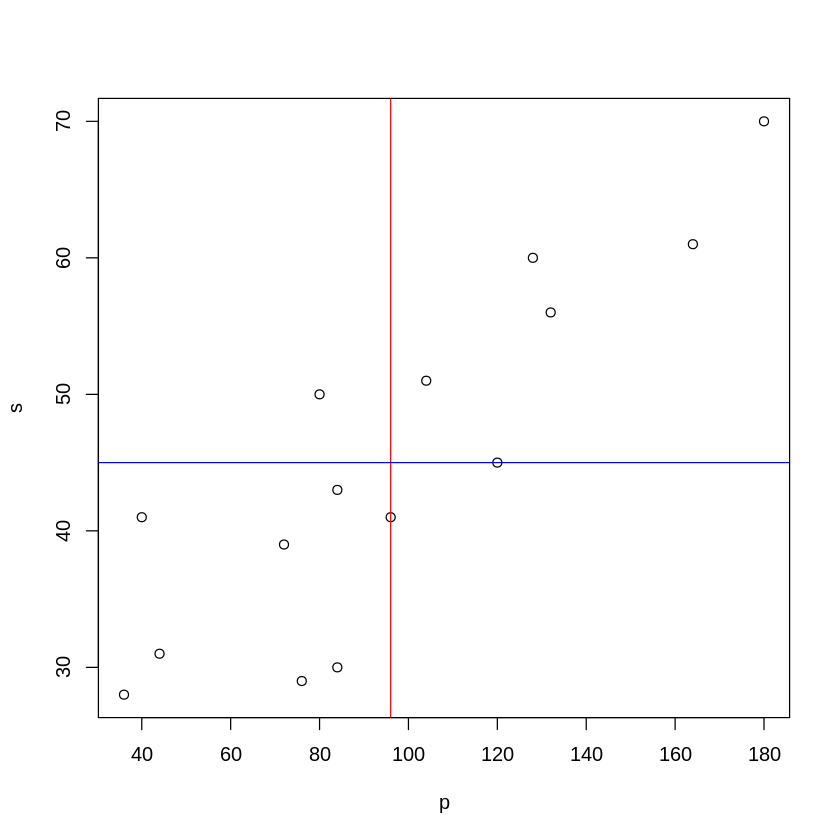

In [29]:
# ex) 전화판촉회수와 판매량의 관계를 통해 판촉횟수가 증가하면 판매량도 증가하는지 알아보세요
p <- c(96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84)
s <- c(41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30)
plot(p,s)
abline(v=mean(p), col='red')
abline(h=mean(s), col='blue')

In [30]:
# 판촉전화횟수와 판매량이 서로 관련있음
cor(p,s)
cor.test(p,s)

[1] 0.8646318


	Pearson's product-moment correlation

data:  p and s
t = 6.2051, df = 13, p-value = 0.00003193
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6325270 0.9542427
sample estimates:
      cor 
0.8646318 


In [31]:
# 선형방정식을 작성하려면 회귀계수(절편, 기울기)가 필요함
# 최소제곱법으로 계산가능, lm 함수로 바로 구할수도 있음
lm(s~p)

# 회귀계수 : coefficients
# 정편 : Intercept  = 19.98
# 기울기 : p        = 0.2606

# 선형방적식 식 : y= 0.26x + 19.98


Call:
lm(formula = s ~ p)

Coefficients:
(Intercept)            p  
    19.9800       0.2606  


### 작성된 방정식의 의미
1) 방정식의 x : 판촉전화 횟수
2) 19.98의 의미 : 판촉전화 횟수가 0일때 제품을 19.98만큼 팔 수 있다?
    - 예측에 사용하기에는 다소 조심스러움
3) 0.26x의 의미 : 판촉전화 횟수가 1일때 0.26만큼 판매량이 증가한다
    - 독립변수가 주어졌을때 종속변수의 변화량을 파악(예측)할 수 있음

In [32]:
# ex> 선형방정식을 이용해서 판촉전화 100회시 예상 판매량은
0.26*100 + 19.98

[1] 45.98

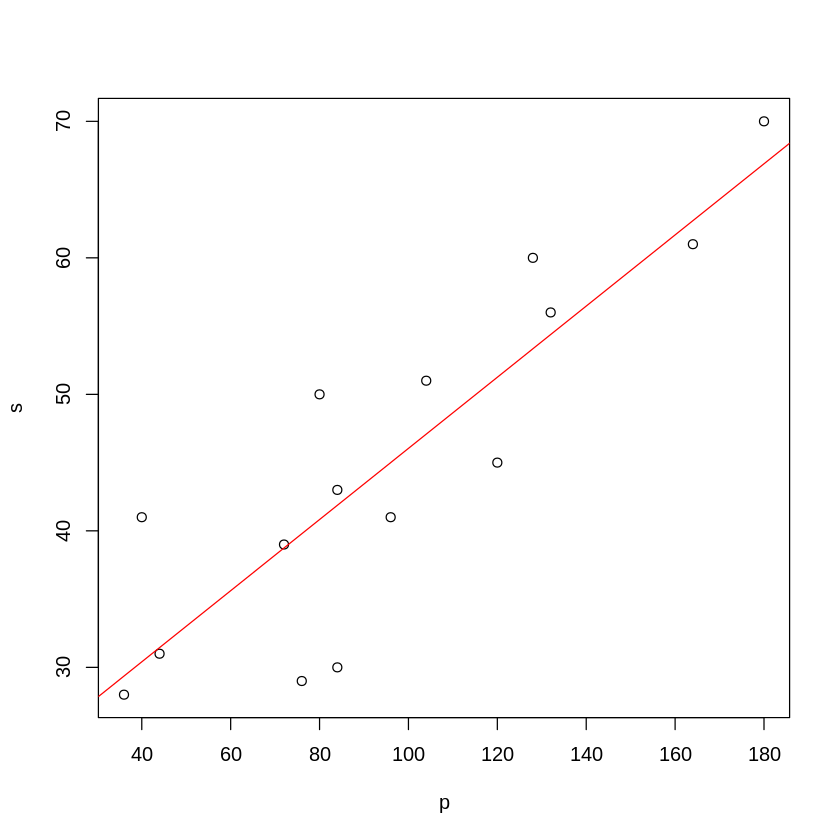

In [33]:
# 선형방정식을 통해 계산된 예측값 시각화
plot(p,s)
abline(lm(s~p), col='red')

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10



Call:
lm(formula = di ~ sp)

Coefficients:
(Intercept)           sp  
    -17.579        3.932  


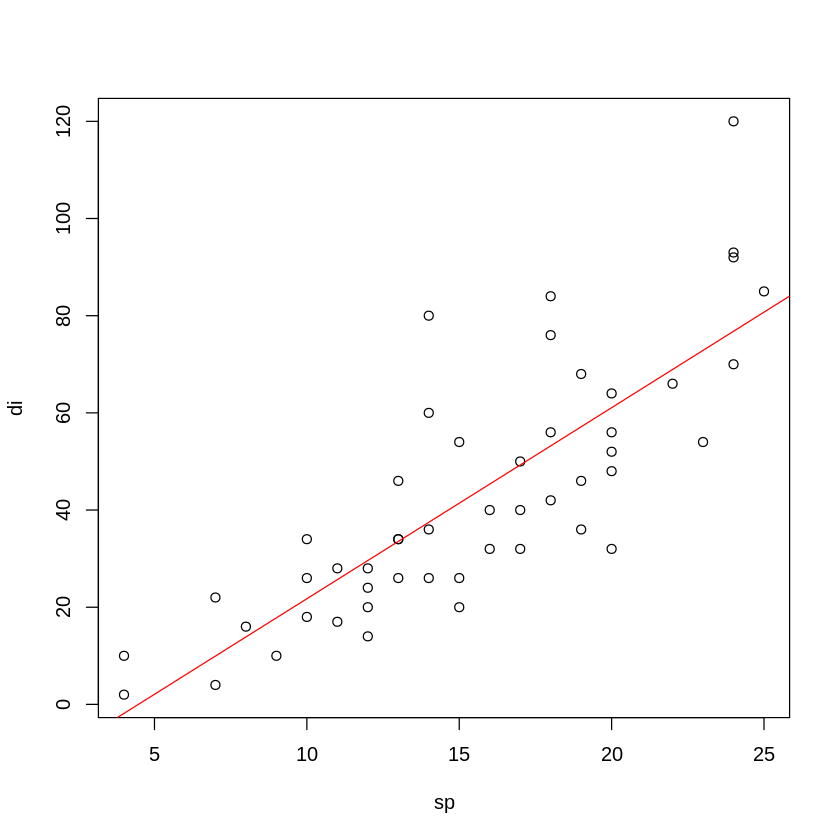

In [34]:
# cars 데이터셋을 이용해서 속도 대비 제동거리에 대해 회귀분석을 해보고 선형방정식을 작성해보세요.
head(cars)
sp <- cars$speed
di <- cars$dist
lm(di~sp)
plot(sp,di)
abline(lm(di~sp), col='red')

,weight,Time
,<dbl>,<dbl>
1,42,0
2,51,2
3,59,4
4,64,6
5,76,8
6,93,10
7,106,12
8,125,14
9,149,16



Call:
lm(formula = we ~ ti)

Coefficients:
(Intercept)           ti  
     24.465        7.988  


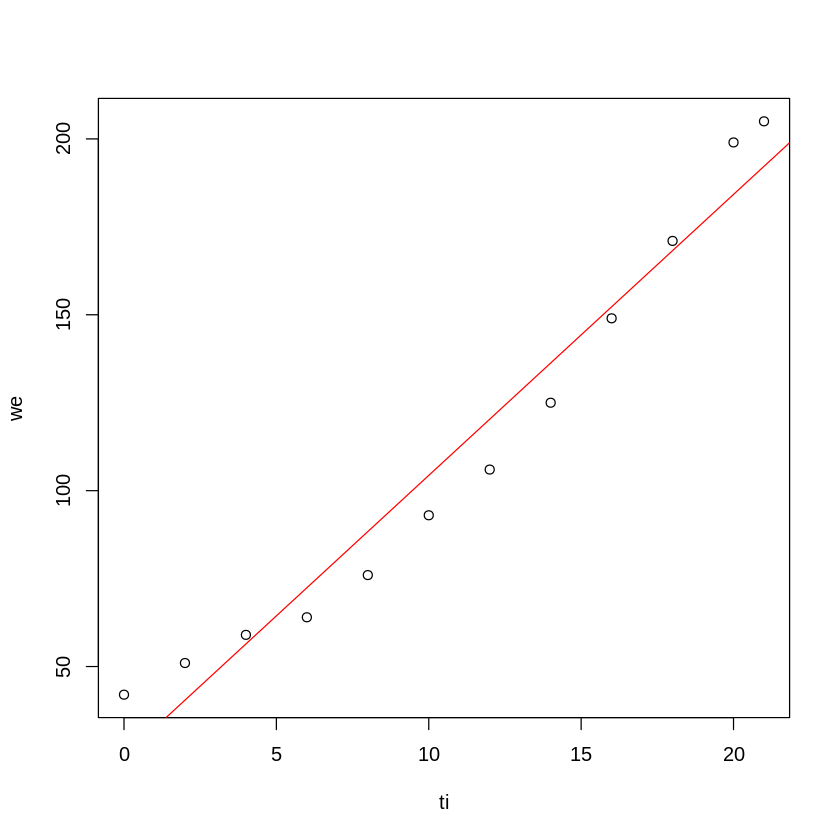

In [35]:
# 식이요법을 적용한 닭에 대한 데이터를 참고해서 '1'번 닭을 대상으로 시간대비 몸무게에 대한 회귀 분석을 실시 하시오(MASS, ChickWeight)
library(MASS)
chi <- ChickWeight[ChickWeight$Chick == 1,1:2]
chi
we <- chi$weight
ti <- chi$Time
lm(we~ti)
plot(ti,we)
abline(lm(we~ti), col='red')

### 회귀식 평가
+ 전화 횟수 대비 판매량에 대한 회귀식
    - y = 0.26x + 19.98
+ 전화 횟수가 84회 일때 판매량은 41.87로 예측
+ 하지만 실제값은 43, 30 으로 나옴
    - 과연, 이 방정식은 믿을만 한가?
    - 회귀모형model 분석 필요
+ R에서는 lm함수로 회귀식을 계산한 후 summary함수로 출력하면 회귀모형 평가 결과 출력

In [36]:
p <- c(96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84)
s <- c(41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30)
model <- lm(s~p)
summary(model)


Call:
lm(formula = s ~ p)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.873  -2.861   0.255   3.511  10.595 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  19.9800     4.3897   4.552  0.000544 ***
p             0.2606     0.0420   6.205 0.0000319 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.72 on 13 degrees of freedom
Multiple R-squared:  0.7476,	Adjusted R-squared:  0.7282 
F-statistic:  38.5 on 1 and 13 DF,  p-value: 0.00003193


### 분석결과 이해하기
1. 결정개수 $R^2$ : R-squared : 0.7476    // Multiple R-squared:  0.7476
    - 회귀모형이 나름 의미가 존재하는지 여부 파악
    - 회귀선과 실제 데이터가 얼마나 가깝게 분포하는지 알아 볼 수 있음
2. 회귀계수의 유의성 : F-statistic , p-value
    - 귀무가설 : 회귀계수 갯수가 0 이다
    - 대립가설 : 회귀계수 갯수가 0이 아니다
    - F 검정을 통해 회귀계수 유무파악
    
3. 각 회귀계수별 유의성 : Coefficients -> Pr(>|t|)
    - 귀무가설 : 회귀계수가 유의하지 않다
    - 대립가설 : 회귀계수가 유의하다
    - t 검정을 통해 회귀계수 유무파악    

In [37]:
# cars 데이터셋을 이용한 속도 대비 제동거리에 대한 최귀모형을 평가해 보세요
car1<-lm(di~sp)
summary(car1)


Call:
lm(formula = di ~ sp)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value         Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601           0.0123 *  
sp            3.9324     0.4155   9.464 0.00000000000149 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 0.00000000000149


In [38]:
# ChickWeight 데이터셋을 이용한 '1'번 닭을 대상으로 시간대비 몸무게에 대한 회귀 모형을 평가해 보세요.
chi1<-lm(we~ti)
summary(chi1)


Call:
lm(formula = we ~ ti)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3202 -11.3081  -0.3444  11.1162  17.5346 

Coefficients:
            Estimate Std. Error t value     Pr(>|t|)    
(Intercept)  24.4654     6.7279   3.636      0.00456 ** 
ti            7.9879     0.5236  15.255 0.0000000297 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 10 degrees of freedom
Multiple R-squared:  0.9588,	Adjusted R-squared:  0.9547 
F-statistic: 232.7 on 1 and 10 DF,  p-value: 0.00000002974


### 선형회귀linear regression

+ 데이터들 사이의 상관관계 또는 추이를 예측하거나 대상값 자체를 예측하는 지도학습 알고리즘
+ 예를 들어, 방의 갯수와 집값의 상관관계 또는 과거 10년간의 영업실적을 분석하여 미래의 영업실적을 예측하는 것
+ 하나의 종속변수와 하나이상의 독립변수 간의 상관관계를 기본으로 하여 하나의 n차 선형방정식으로 변수관계를 일반화하는 분석방법
+ 하나의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 '단순 선형회귀'라 하고 
+ 둘 이상의 독립변수를 통해 종속변수 값을 잘 설명할 수 있으면 '다중 선형회귀'라 함


### 선형성linearity

+ 두 변수의 관계가 하나의 직선의 형태로 설명될 수 있는 관계를 지닌다는 것


+ 회귀분석의 중요 개념
    + 선형방정식 : 두 변수간의 관계를 방정식으로 표현
    + 기울기     : 독립변수가 종속변수에 얼마나 영향을 주는지 그 크기와 방향을 파악
    + 절편       : 회귀선을 얼마나 위/아래로 평행이동시키는지 파악

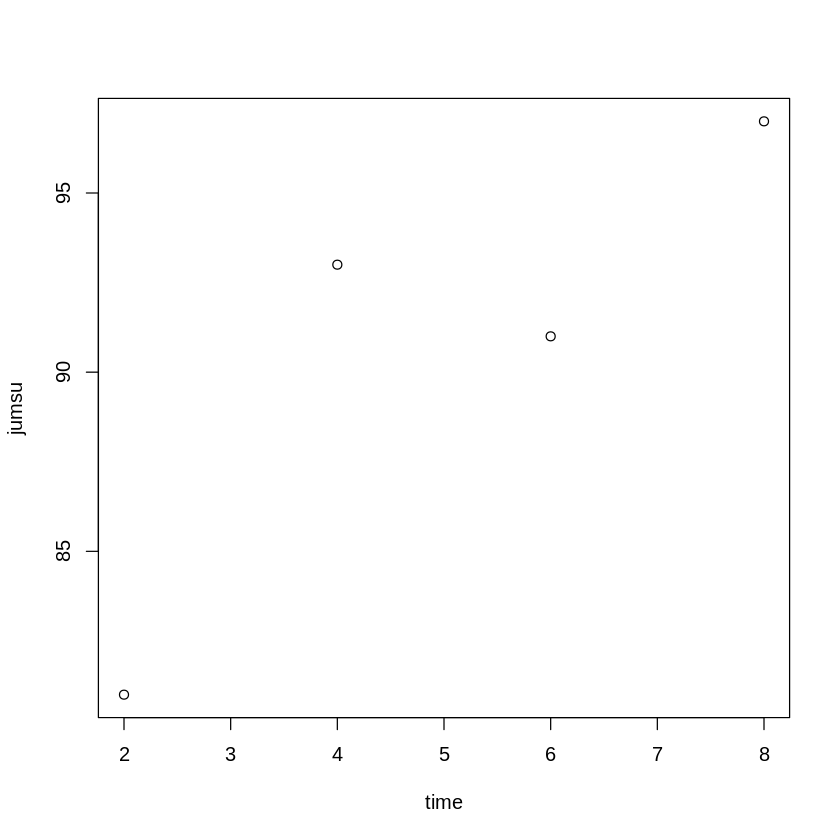

In [39]:
# ex) 공부시간 대비 성적을 단순선형회귀를 이용해서 예측해 봄
time <- c(2,4,6,8)            # 독립변수 x
jumsu <- c(81,93,91,97)       # 종속변수 y
plot(time,jumsu)

In [40]:
# 방정식 : y = ax + b
# 회귀계수 a,b를 구하기 위한 다양한 방법이 존재
# 여기서, 최소제곱법을 이용함
# 기울기 = (x - x평균)*(y - y평균)의 총합 / (x - x평균)^2의 총합
# 절편 = y평균 - (x평균 * 기울기)

mx <- mean(time)
my <- mean(jumsu)
sprintf('mx : %.1f my : %.1f', mx, my)

lm(jumsu~time)  # 이거 풀이식

# divsor  # 분자 인데 분모의 식을 넣음...
# (x - x평균)^2의 총합
divsor <- 0
for (i in 1:4) {
    divsor <- divsor + ((time[i] - mx) ** 2)
}
divsor # 20

# divtop  # 분모 인데 분자의 식을 넣음...
# 최소제곱법 중 분모에 해당 하는 값 계산용 함수
# (x - x평균)*(y - y평균)의 총합
dividen <- function(x, mx, y, my) {
    sums <- 0
    for (i in 1:4){
        sums <- sums + ((x[i] - mx ) * (y[i] - my))
    }
    return(sums)
}
divtop <- dividen (time, mx, jumsu, my)
divtop # 46

# 근데 식은 제대로 넣음... 분자/분모 로 읽어야 됨
a <- divtop/divsor
a  # 2.3

# y평균 - (x평균 * 기울기)
b = my - (mx * a)
b  # 79

model <- lm(jumsu~time)
summary(model)   # y = 2.3x + 79

[1] "mx : 5.0 my : 90.5"


Call:
lm(formula = jumsu ~ time)

Coefficients:
(Intercept)         time  
       79.0          2.3  


[1] 20

[1] 46

[1] 2.3

[1] 79


Call:
lm(formula = jumsu ~ time)

Residuals:
   1    2    3    4 
-2.6  4.8 -1.8 -0.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   79.000      4.990  15.832  0.00397 **
time           2.300      0.911   2.525  0.12756   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.074 on 2 degrees of freedom
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.6417 
F-statistic: 6.373 on 1 and 2 DF,  p-value: 0.1276


[1] 83.6 88.2 92.8 97.4

[1] 81 93 91 97

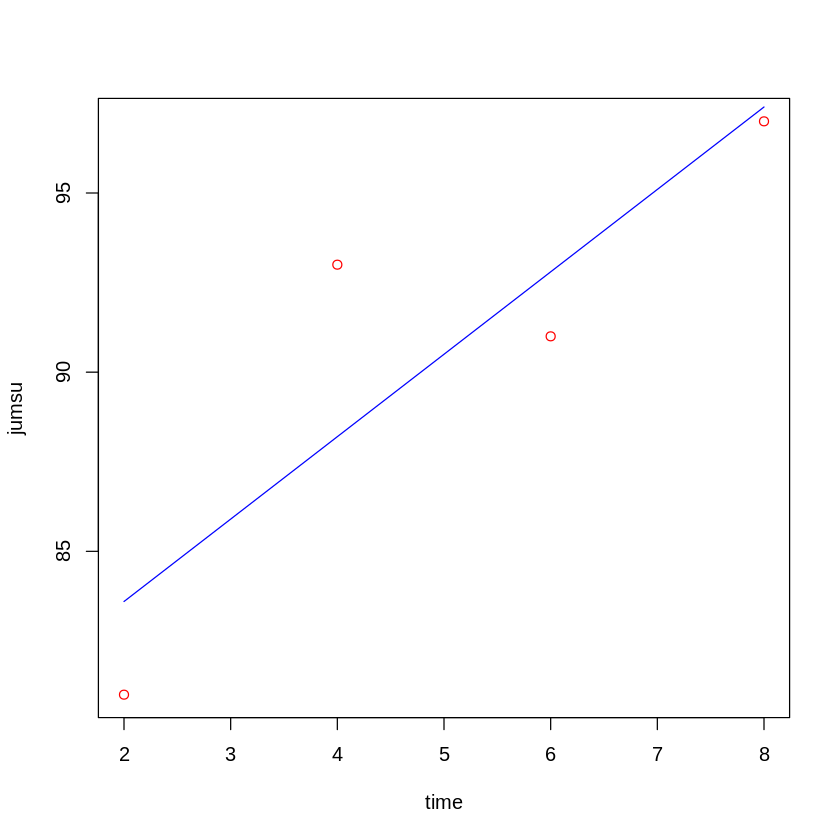

In [41]:
# 선형회귀식을 이용해서 회귀직선을 그려봄
z <- c(0,0,0,0) # 예측값
for (i in 1:4) {
    z[i] <- (2.3 * time[i] + 79)
}
z
jumsu

# 예측값/실제값 시각화
plot(time, jumsu, col='red') 
lines(time, z, col='blue')

In [42]:
# 만약, 5 / 10 시간 공부시 예상 성적은?
2.3*5 +79
2.3*10 + 79

[1] 90.5

[1] 102

[1] 0.8886267


	Pearson's product-moment correlation

data:  delivery$dist and delivery$time
t = 6.7119, df = 12, p-value = 0.00002159
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6774617 0.9644707
sample estimates:
      cor 
0.8886267 


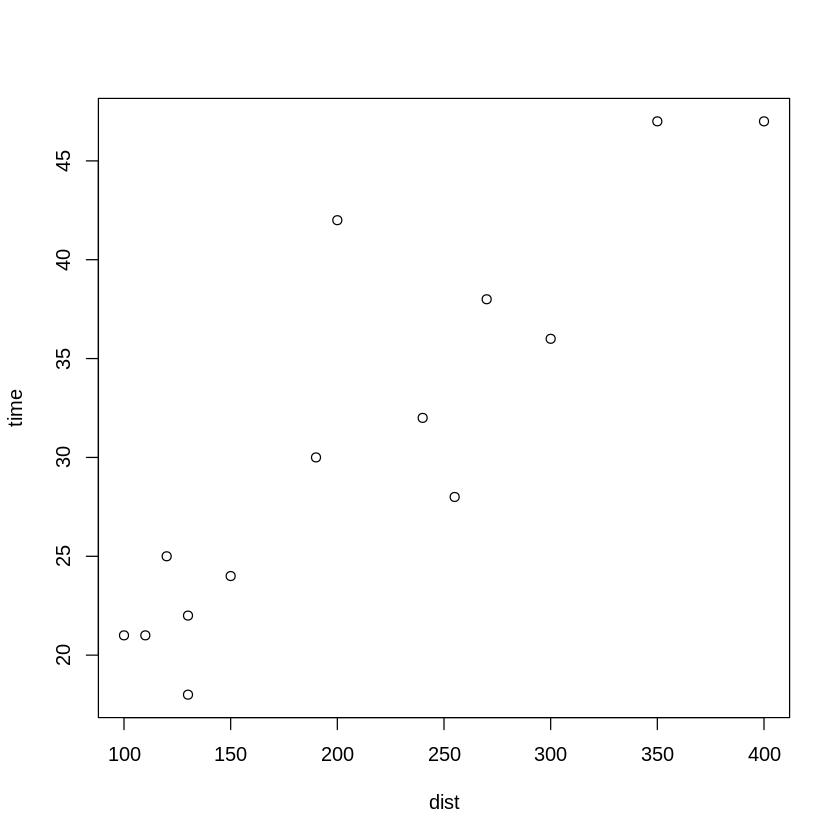

In [43]:
# 배달 정보 데이터를 이용해서 회귀분석을 실시하고 회귀계수와 R^2을 구하시오
delivery <- read.csv('csv/delivery.txt')
colnames(delivery) <- c('dist','time')
plot(delivery)

cor(delivery$dist, delivery$time)

cor.test(delivery$dist, delivery$time)

In [44]:
lm(time~dist, delivery)
# y = 0.09x + 11.48

summary(lm(time~dist, delivery))
# R^2 = 0.7897


Call:
lm(formula = time ~ dist, data = delivery)

Coefficients:
(Intercept)         dist  
   11.48098      0.09177  



Call:
lm(formula = time ~ dist, data = delivery)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8826 -1.4824 -0.8826  1.5762 12.1648 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 11.48098    3.13695   3.660   0.00327 ** 
dist         0.09177    0.01367   6.712 0.0000216 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.685 on 12 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7721 
F-statistic: 45.05 on 1 and 12 DF,  p-value: 0.00002159
